## Random Forrest Classifier

In [14]:
#!/usr/bin/env python -W ignore

In [2]:
from init import *

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import datasets

from sklearn.decomposition import PCA

import pandas as pd

In [4]:
%matplotlib inline

In [5]:
X = train_features.reshape(50000, 3*32*32)
Xt = test_features.reshape(10000, 3*32*32)
y = train_labels.flatten()
yt = test_labels.flatten()

In [6]:
def RFC(n=16, _X=None, _Xt=None):
    if _X is None:
        _X = X
    
    if _Xt is None:
        _Xt = Xt
    
    msg("[RFC/%d] Training" % n)
    rfc = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    rfc.fit(_X, y)
    done()
    
    msg("[RFC/%d] Training Accuracy" % n)
    _X_pred = rfc.predict(_X)
    msg(metrics.accuracy_score(y, _X_pred))
    done()
    
    msg("[RFC/%d] Testing Accuracy" % n)
    _Xt_pred = rfc.predict(_Xt)
    msg(metrics.accuracy_score(yt, _Xt_pred))
    done()
    
#     print("==== Training Accuracy ====")
#     print(acc_train)
#     print("==== Testing Accuracy ====")
#     print(acc_test)
    print("")

### Experiments

In [14]:
for x in [8,16,24,32,48,64,78,96,128,150,200,256]:
    RFC(x)

[RFC/8] Training ... done.
[RFC/8] Training Accuracy ... 0.9848 ... done.
[RFC/8] Testing Accuracy ... 0.3476 ... done.

[RFC/16] Training ... done.
[RFC/16] Training Accuracy ... 0.99906 ... done.
[RFC/16] Testing Accuracy ... 0.3894 ... done.

[RFC/24] Training ... done.
[RFC/24] Training Accuracy ... 0.9999 ... done.
[RFC/24] Testing Accuracy ... 0.4115 ... done.

[RFC/32] Training ... done.
[RFC/32] Training Accuracy ... 0.9999 ... done.
[RFC/32] Testing Accuracy ... 0.43 ... done.

[RFC/48] Training ... done.
[RFC/48] Training Accuracy ... 1.0 ... done.
[RFC/48] Testing Accuracy ... 0.4485 ... done.

[RFC/64] Training ... done.
[RFC/64] Training Accuracy ... 1.0 ... done.
[RFC/64] Testing Accuracy ... 0.4595 ... done.

[RFC/78] Training ... done.
[RFC/78] Training Accuracy ... 1.0 ... done.
[RFC/78] Testing Accuracy ... 0.4527 ... done.

[RFC/96] Training ... done.
[RFC/96] Training Accuracy ... 1.0 ... done.
[RFC/96] Testing Accuracy ... 0.466 ... done.

[RFC/128] Training ... do

KeyboardInterrupt: 

In [6]:
for x in [128, 256, 512, 1024, 2084, 4096]:
    RFC(x)

[RFC/128] Training ... done.
[RFC/128] Training Accuracy ... 1.0 ... done.
[RFC/128] Testing Accuracy ... 0.4798 ... done.

[RFC/256] Training ... done.
[RFC/256] Training Accuracy ... 1.0 ... done.
[RFC/256] Testing Accuracy ... 0.4873 ... done.

[RFC/512] Training ... done.
[RFC/512] Training Accuracy ... 1.0 ... done.
[RFC/512] Testing Accuracy ... 0.4926 ... done.

[RFC/1024] Training ... done.
[RFC/1024] Training Accuracy ... 1.0 ... done.
[RFC/1024] Testing Accuracy ... 0.4897 ... done.

[RFC/2084] Training ... 

KeyboardInterrupt: 

### Results

In [12]:
pd_results_pca_logistic_regression = pd.DataFrame([
        ['Logistic Regression', 37.5],
        ['PCA/50 + Log Reg.', 37.69],
        ['PCA/100 + Log Reg.', 40.13],
        ['PCA/150 + Log Reg.', 40.18],
        ['PCA/200 + Log Reg.', 41.04],
        ['PCA/225 + Log Reg.', 40.56],
        ['PCA/250 + Log Reg.', 40.87],
        ['RFC/8', 34.76],
        ['RFC/16', 38.94],
        ['RFC/24', 41.15],
        ['RFC/32', 43.00],
        ['RFC/64', 44.85],
        ['RFC/78', 45.95],
        ['RFC/96', 45.27],
        ['RFC/128', 47.98],
        ['RFC/256', 48.73],
        ['RFC/512', 49.26],
        ['RFC/1024', 48.97],
        ['PCA/200 + RFC/512', 48.59],
        ['PCA/200 + RFC/1024', 49.52]
    ], columns=['Classifier', 'Accuracy'])

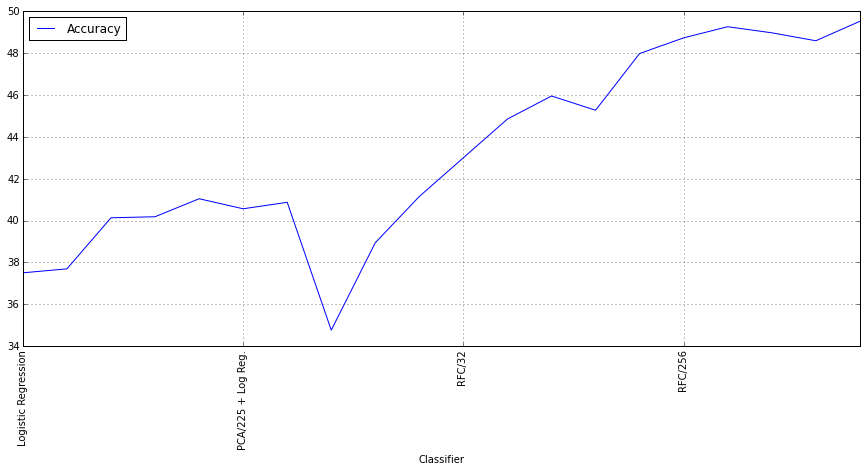

In [17]:
pd_results.plot(x='Classifier', y='Accuracy', rot=90, figsize=(15,6), grid=True)

In [31]:
pd_results

,Classifier,Accuracy
0,Logistic Regression,37.50
1,PCA/50 + Log Reg.,37.69
2,PCA/100 + Log Reg.,40.13
3,PCA/150 + Log Reg.,40.18
4,PCA/200 + Log Reg.,41.04
5,PCA/225 + Log Reg.,40.56
6,PCA/250 + Log Reg.,40.87
7,RFC/8,34.76
8,RFC/16,38.94
9,RFC/24,41.15


### Random Forrest

In [32]:
for i in [8,16,24,32,64,78,96,128,256,512]:
    RFC(n=i)

[RFC/8] Training ... done.
[RFC/8] Training Accuracy ... 0.98572 ... done.
[RFC/8] Testing Accuracy ... 0.3438 ... done.

[RFC/16] Training ... done.
[RFC/16] Training Accuracy ... 0.99924 ... done.
[RFC/16] Testing Accuracy ... 0.3902 ... done.

[RFC/24] Training ... done.
[RFC/24] Training Accuracy ... 0.99984 ... done.
[RFC/24] Testing Accuracy ... 0.4128 ... done.

[RFC/32] Training ... 

KeyboardInterrupt: 

### PCA + Random Forrest

#### Best PCA (200) + Best RFC/512

In [7]:
pca200 = PCA(n_components=200)
pca200.fit(X, y)

PCA(copy=True, n_components=200, whiten=False)

In [8]:
X_pca200 = pca200.transform(X)
Xt_pca200 = pca200.transform(Xt)

In [29]:
for i in [8,16,24,32,64,78,96,128,256,512]:
    RFC(n=i, _X=X_pca200, _Xt=Xt_pca200)

[RFC/8] Training ... done.
[RFC/8] Training Accuracy ... 0.9864 ... done.
[RFC/8] Testing Accuracy ... 0.2742 ... done.

[RFC/16] Training ... done.
[RFC/16] Training Accuracy ... 0.9996 ... done.
[RFC/16] Testing Accuracy ... 0.3206 ... done.

[RFC/24] Training ... done.
[RFC/24] Training Accuracy ... 0.99996 ... done.
[RFC/24] Testing Accuracy ... 0.3579 ... done.

[RFC/32] Training ... done.
[RFC/32] Training Accuracy ... 1.0 ... done.
[RFC/32] Testing Accuracy ... 0.3773 ... done.

[RFC/64] Training ... done.
[RFC/64] Training Accuracy ... 1.0 ... done.
[RFC/64] Testing Accuracy ... 0.4162 ... done.

[RFC/78] Training ... done.
[RFC/78] Training Accuracy ... 1.0 ... done.
[RFC/78] Testing Accuracy ... 0.4375 ... done.

[RFC/96] Training ... done.
[RFC/96] Training Accuracy ... 1.0 ... done.
[RFC/96] Testing Accuracy ... 0.4417 ... done.

[RFC/128] Training ... done.
[RFC/128] Training Accuracy ... 1.0 ... done.
[RFC/128] Testing Accuracy ... 0.4495 ... done.

[RFC/256] Training ...

### Grayscaling

In [19]:
def rgb2gray_array(rgb):
    r, g, b = rgb[:,0,:,:], rgb[:,1,:,:], rgb[:,2,:,:]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

train_features_gray = rgb2gray_array(train_features)
test_features_gray = rgb2gray_array(test_features)

In [22]:
X_gray = train_features_gray.reshape(50000, 32*32)
Xt_gray = test_features_gray.reshape(10000, 32*32)

In [26]:
for i in [8,16,24,32,64,78,96,128,256,512,1024]:
    RFC(n=i, _X=X_gray, _Xt=Xt_gray)

[RFC/8] Training ... done.
[RFC/8] Training Accuracy ... 0.98446 ... done.
[RFC/8] Testing Accuracy ... 0.2963 ... done.

[RFC/16] Training ... done.
[RFC/16] Training Accuracy ... 0.9992 ... done.
[RFC/16] Testing Accuracy ... 0.3343 ... done.

[RFC/24] Training ... done.
[RFC/24] Training Accuracy ... 0.99992 ... done.
[RFC/24] Testing Accuracy ... 0.3497 ... done.

[RFC/32] Training ... done.
[RFC/32] Training Accuracy ... 0.99996 ... done.
[RFC/32] Testing Accuracy ... 0.3701 ... done.

[RFC/64] Training ... done.
[RFC/64] Training Accuracy ... 1.0 ... done.
[RFC/64] Testing Accuracy ... 0.4014 ... done.

[RFC/78] Training ... done.
[RFC/78] Training Accuracy ... 1.0 ... done.
[RFC/78] Testing Accuracy ... 0.4077 ... done.

[RFC/96] Training ... done.
[RFC/96] Training Accuracy ... 1.0 ... done.
[RFC/96] Testing Accuracy ... 0.4081 ... done.

[RFC/128] Training ... done.
[RFC/128] Training Accuracy ... 1.0 ... done.
[RFC/128] Testing Accuracy ... 0.4221 ... done.

[RFC/256] Trainin

KeyboardInterrupt: 

### Results

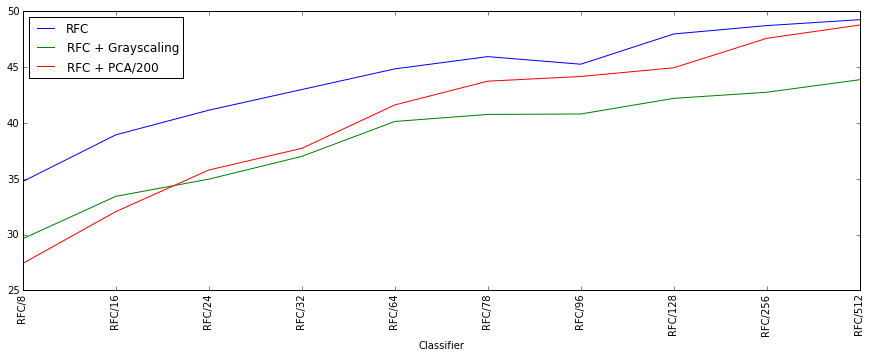

In [30]:
pd_results_rfc = pd.DataFrame([
        ['RFC/8', 34.76],
        ['RFC/16', 38.94],
        ['RFC/24', 41.15],
        ['RFC/32', 43.00],
        ['RFC/64', 44.85],
        ['RFC/78', 45.95],
        ['RFC/96', 45.27],
        ['RFC/128', 47.98],
        ['RFC/256', 48.73],
        ['RFC/512', 49.26],
    ], columns=['Classifier', 'Accuracy'])

pd_results_rfc_grayscaling = pd.DataFrame([
        ['RFC/8', 29.63],
        ['RFC/16', 33.43],
        ['RFC/24', 34.97],
        ['RFC/32', 37.01],
        ['RFC/64', 40.14],
        ['RFC/78', 40.77],
        ['RFC/96', 40.81],
        ['RFC/128', 42.21],
        ['RFC/256', 42.76],
        ['RFC/512', 43.88],
    ], columns=['Classifier', 'Accuracy'])

pd_results_rfc_pca = pd.DataFrame([
        ['RFC/8', 27.42],
        ['RFC/16', 32.06],
        ['RFC/24', 35.79],
        ['RFC/32', 37.73],
        ['RFC/64', 41.62],
        ['RFC/78', 43.75],
        ['RFC/96', 44.17],
        ['RFC/128', 44.95],
        ['RFC/256', 47.59],
        ['RFC/512', 48.78],
    ], columns=['Classifier', 'Accuracy'])

ax = plt.subplot()
pd_results_rfc.plot(x='Classifier', y='Accuracy', ax=ax, rot=90, figsize=(15,5), label='RFC')
pd_results_rfc_grayscaling.plot(x='Classifier', y='Accuracy', ax=ax, rot=90, label='RFC + Grayscaling')
pd_results_rfc_pca.plot(x='Classifier', y='Accuracy', ax=ax, rot=90, label='RFC + PCA/200')